# CMPE 351 Assignment 1

In [187]:
# Importing packages.
from os.path import dirname, join, realpath

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Data collection and processing
import pandas as pd

# Data visualization
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.rcParams["ytick.labelsize"] = 7


def is_interactive():
    import __main__ as main

    return not hasattr(main, "__file__")


if is_interactive():
    script_dir = dirname(realpath("__file__"))
else:
    script_dir = dirname(realpath(__file__))

# Mainly generated by Github Copilot.
def missing_data_summary(df):
    """
    Function to summarize missing data in a dataframe.
    """
    # Calculate missing data
    missing_data = df.isnull().sum()
    # Calculate percentage of missing data
    missing_data_percent = (missing_data / df.shape[0]) * 100
    # Print summary
    return pd.concat(
        [missing_data, missing_data_percent],
        axis=1,
        keys=["Missing", "Percent"],
    )


# To make accessing through keys easier/more consistent.
def normalize_column_names(df):
    return df.rename(
        columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True
    )


# Source: https://stackoverflow.com/a/37871635/8714233
def boxplot_sorted(df, by, column):
    descending_median_order = (
        df.groupby(by)[column].median().sort_values(ascending=False).index
    )

    sns.boxplot(
        x=column,
        y=by,
        data=df,
        order=descending_median_order,
    )

In [153]:
raw_house_prices_1_df = pd.read_csv(
    join(script_dir, "data/2020_brooklyn.csv"), thousands=","
)
raw_house_prices_1_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6359.0,70.0,NaN,S1,8684 15TH AVENUE,NaN,...,1.0,1.0,2.0,1933.0,4080.0,1930.0,1.0,S1,1300000.0,2020-04-28
1,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360.0,48.0,NaN,A5,14 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,2513.0,1428.0,1930.0,1.0,A5,849000.0,2020-03-18
2,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360.0,56.0,NaN,A5,30 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1547.0,1428.0,1930.0,1.0,A5,75000.0,2020-11-30
3,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6362.0,23.0,NaN,A9,43 BAY 11TH STREET,NaN,...,1.0,0.0,1.0,2280.0,1052.0,1901.0,1.0,A9,0.0,2020-11-04
4,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367.0,24.0,NaN,A9,8645 BAY 16TH STREET,NaN,...,1.0,0.0,1.0,1571.0,1456.0,1935.0,1.0,A9,830000.0,2020-06-26


In [154]:
raw_house_prices_2_df = pd.read_csv(
    join(script_dir, "data/2020_queens.csv"), thousands=","
)
raw_house_prices_2_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4.0,AIRPORT JFK,39 TRANSPORTATION FACILITIES,4,14260.0,80.0,NaN,V7,N/A ROCKAWAY BLVD,NaN,...,0.0,0.0,0.0,268092.0,0.0,NaN,4.0,T1,4121000.0,2020-07-16
1,4.0,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,949.0,41.0,NaN,A5,19-62 81ST STREET,NaN,...,1.0,0.0,1.0,1800.0,1224.0,1945.0,1.0,A5,584569.0,2020-08-28
2,4.0,AIRPORT LA GUARDIA,12 CONDOS - WALKUP APARTMENTS,2,949.0,1003.0,NaN,R2,"19-37 80TH STREET, 1",1,...,1.0,NaN,1.0,NaN,NaN,NaN,2.0,R2,420000.0,2020-03-12
3,4.0,ARVERNE,01 ONE FAMILY DWELLINGS,1,15830.0,20.0,NaN,A5,3-20 BEACH 41 STREET,NaN,...,1.0,0.0,1.0,2469.0,1476.0,2005.0,1.0,A5,300000.0,2020-12-16
4,4.0,ARVERNE,01 ONE FAMILY DWELLINGS,1,15830.0,27.0,NaN,A5,336 BEACH 41ST STREET,NaN,...,1.0,0.0,1.0,2325.0,1350.0,2005.0,1.0,A5,360000.0,2020-06-23


In [155]:
normalize_column_names(raw_house_prices_1_df)
normalize_column_names(raw_house_prices_2_df)

## Part 1: Feature Selection and Multicollinearity Analysis

### Answer to RQ1.1

Splitting the training and test data.

In [156]:
training_data_1_df, test_data_1_df = train_test_split(
    raw_house_prices_1_df, test_size=0.1
)

training_data_2_df, test_data_2_df = train_test_split(
    raw_house_prices_2_df, test_size=0.1
)

training_data = pd.concat([training_data_1_df, training_data_2_df])

### Answer to RQ1.2

Let's first do some data exploration.

How many variables/attributes does the dataset have? 21

In [157]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44760 entries, 11098 to 20331
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         34937 non-null  float64
 1   neighborhood                    34937 non-null  object 
 2   building_class_category         34937 non-null  object 
 3   tax_class_at_present            34912 non-null  object 
 4   block                           34937 non-null  float64
 5   lot                             34937 non-null  float64
 6   ease-ment                       0 non-null      float64
 7   building_class_at_present       34912 non-null  object 
 8   address                         34937 non-null  object 
 9   apartment_number                6734 non-null   object 
 10  zip_code                        34936 non-null  float64
 11  residential_units               28742 non-null  float64
 12  commercial_units            

In [158]:
training_data.describe()

,borough,block,lot,ease-ment,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price
count,34937.000000,34937.000000,34937.000000,0.0,34936.000000,28742.000000,24590.000000,29819.000000,23513.000000,2.351300e+04,33033.000000,34937.000000,3.493700e+04
mean,3.524458,5718.347454,269.383319,NaN,11301.315921,3.095540,0.182717,3.134411,3606.902012,4.410874e+03,1947.631490,1.535077,8.326595e+05
std,0.499409,3932.843205,488.544748,NaN,116.535617,22.956669,1.824301,22.607156,9732.780142,3.083072e+04,34.453125,0.819621,4.598624e+06
min,3.000000,1.000000,1.000000,NaN,10013.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1018.000000,1.000000,0.000000e+00
25%,3.000000,2166.000000,20.000000,NaN,11216.000000,1.000000,0.000000,1.000000,2000.000000,1.368000e+03,1925.000000,1.000000,0.000000e+00
50%,4.000000,5367.000000,45.000000,NaN,11237.000000,1.000000,0.000000,1.000000,2500.000000,1.932000e+03,1940.000000,1.000000,3.802500e+05
75%,4.000000,8276.000000,108.000000,NaN,11377.000000,2.000000,0.000000,2.000000,3800.000000,2.715000e+03,1962.000000,2.000000,8.200000e+05
max,4.000000,16350.000000,7113.000000,NaN,11697.000000,500.000000,210.000000,501.000000,905000.000000,2.401524e+06,2021.000000,4.000000,3.693000e+08


How much missing data is there?

                                Missing     Percent
borough                            9823   21.945934
neighborhood                       9823   21.945934
building_class_category            9823   21.945934
tax_class_at_present               9848   22.001787
block                              9823   21.945934
lot                                9823   21.945934
ease-ment                         44760  100.000000
building_class_at_present          9848   22.001787
address                            9823   21.945934
apartment_number                  38026   84.955317
zip_code                           9824   21.948168
residential_units                 16018   35.786416
commercial_units                  20170   45.062556
total_units                       14941   33.380250
land_square_feet                  21247   47.468722
gross_square_feet                 21247   47.468722
year_built                        11727   26.199732
tax_class_at_time_of_sale          9823   21.945934
building_cla

<AxesSubplot:>

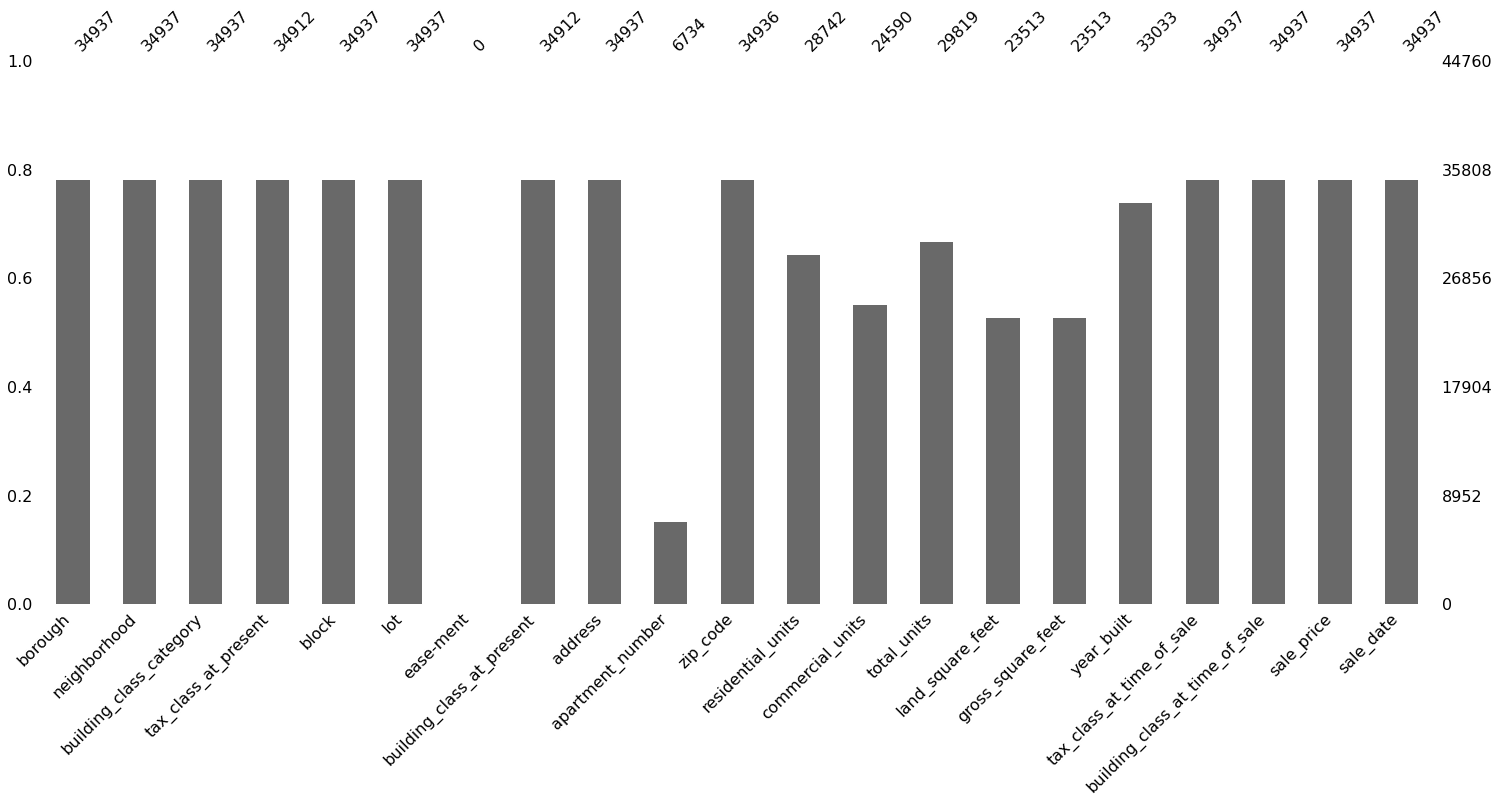

In [159]:
print(missing_data_summary(training_data))
msno.bar(training_data)

About 23% of the sale price values are missing/not known. Given that this is the target of the regression analysis, the missing values won't help in building the model. Also, Sale prices of $0 indicates that there was a transfer of ownership without a cash consideration, which also doesn't help contribute to building the model. Therefore, these rows can be safely removed.

<AxesSubplot:>

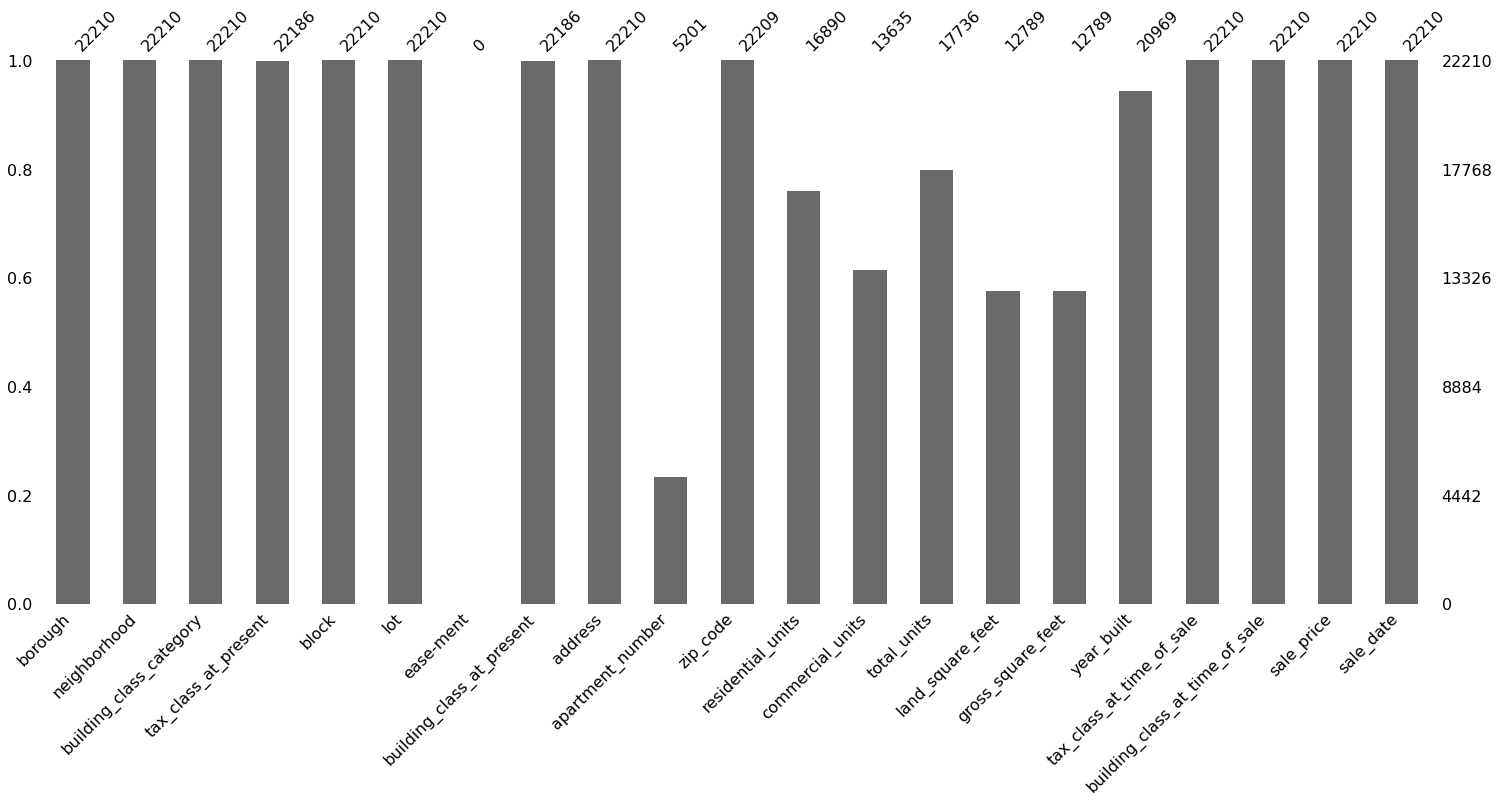

In [160]:
training_data = training_data.dropna(subset=["sale_price"])
training_data = training_data[training_data["sale_price"] != 0]

msno.bar(training_data)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

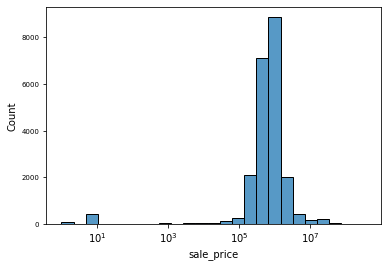

In [161]:
# Observing potential outliers and skewness in the data.
sns.histplot(training_data["sale_price"], log_scale=True, bins=25)

40.07247338971755
-0.003919716152721374


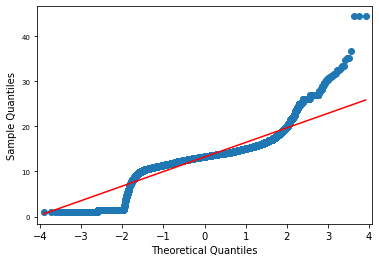

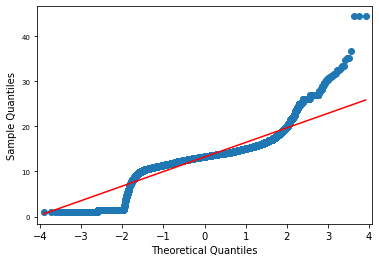

In [162]:
# Dealing with the positive skewness
print(training_data["sale_price"].skew())
training_data["sale_price"] = training_data["sale_price"] ** (1 / 5.2)
print(training_data["sale_price"].skew())
sm.qqplot(training_data["sale_price"], line="s")

- Given that easement has 100% missing values, the feature will be removed from the data set.
- A house' address also somewhat acts as an ID, which means it's likely not relevant to the house' price, despite it being possible for multiple apartments to have the same address.
- A similar argument can be made for zip code due to its uniqueness within the city.
- Since the dataset generated from two different boroughs, it won't have much of an impact on the individual test datasets from particular boroughs.
- Tax class, block, and lot may have been subject to change since the date of the sale, and share overlap with other building class related attributes.
- Similar argument for tax class at time of sale.
- Building class at present would be very similar to build class at time of purchase, with the downside of having less to no influence on its previous sale price.
- Total units encapsulate residential units and commercial units, so the latter two can be removed.

In [163]:
columns_to_drop = [
    "borough",
    "tax_class_at_present",
    "block",
    "lot",
    "ease-ment",
    "address",
    "zip_code",
    "building_class_at_present",
    "tax_class_at_time_of_sale",
    "residential_units",
    "commercial_units",
    "building_class_at_time_of_sale",
    "sale_date",
    "building_class_category",
]

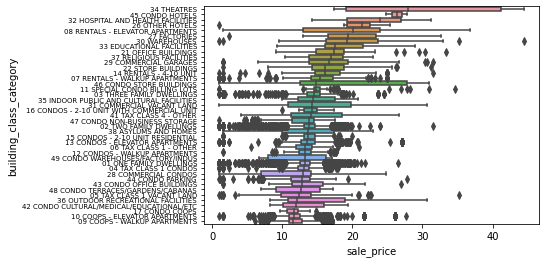

In [164]:
column = "sale_price"
boxplot_sorted(training_data, by="building_class_category", column=column)

The box plot above shows that building class category does have an influence on the sale price, but would be a pain to try and convert into a numerical value with all of the categories. With one hot encoding, it would take some effort to make sure the one hot encoded columns are the same for the training and the test data sets.

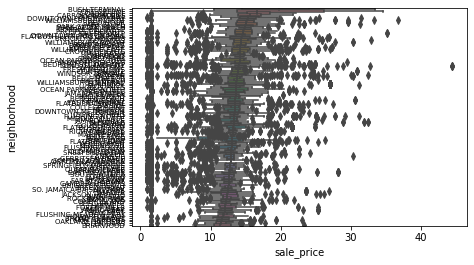

In [165]:
boxplot_sorted(training_data, by="neighborhood", column=column)

Too many neighbourhoods with a lot of outliers, make it difficult to use as a predictor.

In [166]:
columns_to_drop.append("neighborhood")

# Converting the apartment number into a boolean property given how they aren't always unique between different aprtments.
training_data.replace({"apartment_number": {np.nan: 0}}, inplace=True)
training_data.loc[
    training_data["apartment_number"] != 0, "apartment_number"
] = 1
training_data["apartment_number"] = training_data["apartment_number"].astype(
    int
)

training_data["apartment_number"]

11098    0
1017     0
6043     0
18268    0
2278     0
        ..
14524    0
288      0
11971    0
12923    0
19870    0
Name: apartment_number, Length: 22210, dtype: int64

In [167]:
# Preprocessing total units
training_data["total_units"].fillna(value=1, inplace=True)
training_data["total_units"] = training_data["total_units"].astype(int)

In [168]:
# Preprocessing the size related attributes.
training_data["land_square_feet"].fillna(
    value=training_data["land_square_feet"].mean(), inplace=True
)
training_data["gross_square_feet"].fillna(
    value=training_data["gross_square_feet"].mean(), inplace=True
)

# Taking the average year built.
training_data["year_built"].fillna(
    value=training_data["year_built"].mean(), inplace=True
)

In [169]:
training_data.drop(columns_to_drop, axis=1, inplace=True)

### Answer to RQ1.3

In [170]:
training_data.corr(method="pearson")

,apartment_number,total_units,land_square_feet,gross_square_feet,year_built,sale_price
apartment_number,1.000000,0.088901,0.036149,0.127045,0.563084,0.062047
total_units,0.088901,1.000000,0.227675,0.977852,0.095165,0.052210
land_square_feet,0.036149,0.227675,1.000000,0.306021,0.066066,0.230100
gross_square_feet,0.127045,0.977852,0.306021,1.000000,0.129398,0.085130
year_built,0.563084,0.095165,0.066066,0.129398,1.000000,0.023217
sale_price,0.062047,0.052210,0.230100,0.085130,0.023217,1.000000


It's surprising to see that the correlation between the gross square feet and the total units is very high (over 0.9). Let's drop the total number of units attribute.

In [171]:
columns_to_drop.append("total_units")
training_data.drop(["total_units"], axis=1, inplace=True)

### Answer to RQ1.4

- Attributes chosen:
  - Apartment number (transformed into boolean)
  - Land square feet
  - Gross square feet
  - Year built
  - Building class at time of sale
  - Sale Date

In [172]:
training_data.head()

,apartment_number,land_square_feet,gross_square_feet,year_built,sale_price
11098,0,2033.0,2394.0,1899.0,15.406708
1017,0,2019.0,1620.0,1910.0,13.635968
6043,0,3040.0,3375.0,1905.0,17.061883
18268,0,2275.0,2310.0,1925.0,16.123251
2278,0,4000.0,1859.0,1925.0,15.151053


## Part 2: Prediction using Regression Models

In [173]:
test_data_1_df = test_data_1_df.dropna(subset=["sale_price"])
test_data_1_df = test_data_1_df[test_data_1_df["sale_price"] != 0]
test_data_2_df = test_data_2_df.dropna(subset=["sale_price"])
test_data_2_df = test_data_2_df[test_data_2_df["sale_price"] != 0]

In [174]:
test_data_1_df["sale_price"] = test_data_1_df["sale_price"] ** (1 / 5.2)
test_data_2_df["sale_price"] = test_data_2_df["sale_price"] ** (1 / 5.2)

In [175]:
test_data_1_df.replace({"apartment_number": {np.nan: 0}}, inplace=True)
test_data_1_df.loc[
    test_data_1_df["apartment_number"] != 0, "apartment_number"
] = 1
test_data_1_df["apartment_number"] = test_data_1_df["apartment_number"].astype(
    int
)
test_data_2_df.replace({"apartment_number": {np.nan: 0}}, inplace=True)
test_data_2_df.loc[
    test_data_2_df["apartment_number"] != 0, "apartment_number"
] = 1
test_data_2_df["apartment_number"] = test_data_2_df["apartment_number"].astype(
    int
)

In [176]:
test_data_1_df["land_square_feet"].fillna(
    value=test_data_1_df["land_square_feet"].mean(), inplace=True
)
test_data_1_df["gross_square_feet"].fillna(
    value=test_data_1_df["gross_square_feet"].mean(), inplace=True
)
test_data_1_df["year_built"].fillna(
    value=test_data_1_df["year_built"].mean(), inplace=True
)
test_data_2_df["land_square_feet"].fillna(
    value=test_data_2_df["land_square_feet"].mean(), inplace=True
)
test_data_2_df["gross_square_feet"].fillna(
    value=test_data_2_df["gross_square_feet"].mean(), inplace=True
)
test_data_2_df["year_built"].fillna(
    value=test_data_2_df["year_built"].mean(), inplace=True
)

In [177]:
test_data_1_df.drop(columns_to_drop, axis=1, inplace=True)
test_data_2_df.drop(columns_to_drop, axis=1, inplace=True)

In [178]:
test_data_1_df

,apartment_number,land_square_feet,gross_square_feet,year_built,sale_price
14652,0,1600.000000,1488.000000,1940.00000,12.703281
1676,1,3766.804054,9306.903716,2018.00000,14.237296
10724,0,2000.000000,3480.000000,1899.00000,17.010025
17824,1,3766.804054,9306.903716,1951.68081,14.167795
2702,0,3766.804054,9306.903716,1914.00000,14.038960
...,...,...,...,...,...
16237,1,3766.804054,9306.903716,1993.00000,12.833690
7594,1,21474.000000,472115.000000,2017.00000,17.725509
10991,0,1800.000000,2320.000000,1925.00000,11.677547
17898,1,3766.804054,9306.903716,1951.68081,14.385369


In [179]:
training_data

,apartment_number,land_square_feet,gross_square_feet,year_built,sale_price
11098,0,2033.000000,2394.00000,1899.0,15.406708
1017,0,2019.000000,1620.00000,1910.0,13.635968
6043,0,3040.000000,3375.00000,1905.0,17.061883
18268,0,2275.000000,2310.00000,1925.0,16.123251
2278,0,4000.000000,1859.00000,1925.0,15.151053
...,...,...,...,...,...
14524,0,3000.000000,1216.00000,1930.0,13.019440
288,0,1781.000000,3600.00000,1920.0,15.782044
11971,0,3671.414888,5162.70459,1952.0,11.645736
12923,0,2000.000000,2680.00000,1950.0,14.747710


### Model 1

In [180]:
# Predict sale price using the training data and a linear regression model.
model_1 = sm.OLS(
    training_data["sale_price"], training_data.drop(["sale_price"], axis=1)
).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             sale_price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          9.829e+04
Date:                Fri, 28 Jan 2022   Prob (F-statistic):                        0.00
Time:                        23:02:17   Log-Likelihood:                         -56962.
No. Observations:               22210   AIC:                                  1.139e+05
Df Residuals:                   22206   BIC:                                  1.140e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
apartment_number      0.1090      0.051      2.157      0.031       0.010       0.208
land_square_feet      0.0001   3.58e-06     32.564      0.000       0.000       0.000
gross_square_feet  7.584e-07    8.8e-07      0.862      0.389   -9.67e-07    2.48e-06
year_built            0.0065   1.39e-05    469.729      0.000       0.007       0.007
==============================================================================
Omnibus:                     4018.653   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50992.824
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                      10.357   Cond. No.                     6.23e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
predictions_1 = model_1.predict(test_data_1_df.drop(["sale_price"], axis=1))
rms = mean_squared_error(
    test_data_1_df["sale_price"], predictions_1, squared=False
)

rms

3.316163772102329

In [190]:
predictions_2 = model_1.predict(test_data_2_df.drop(["sale_price"], axis=1))
rms = mean_squared_error(
    test_data_2_df["sale_price"], predictions_2, squared=False
)

rms

2.9005446623567646

### Model 2

### Results